In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [63]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [148]:
# Calculate the date from the last data point in the database
latestdate=session.query(Measurement.date).order_by(Measurement.date.desc()).first()

latestdate

('2017-08-23')

In [149]:
# Calculate the date 1 year ago from the last data point in the database
yearago = dt.date(2017, 8, 23) - dt.timedelta(days=365.25)
print("Year ago date from latest data point: ", yearago)

Year ago date from latest data point:  2016-08-23


In [150]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastyear_precipitation=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>=yearago).all()
   
lastyear_precipitation


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [139]:
#Create a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(lastyear_precipitation, columns=['date', 'precipitation'])

df.set_index('date', inplace=True, drop=False)
df=df.sort_index()
df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


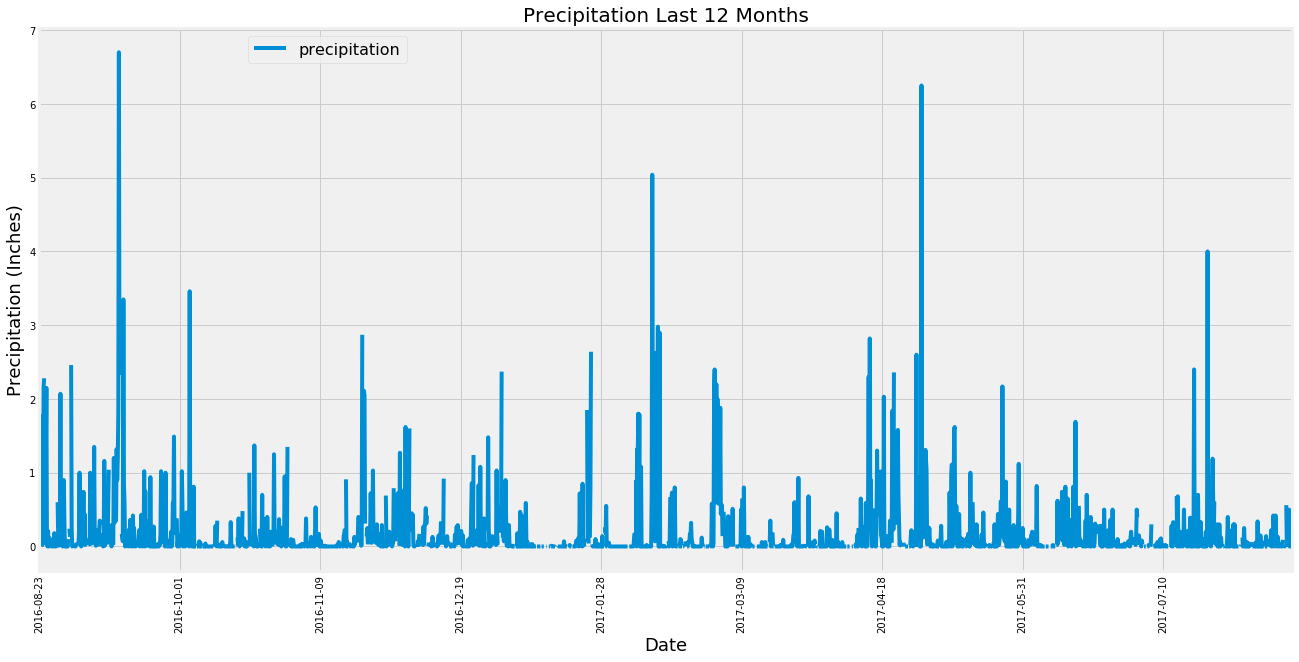

In [147]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, figsize=(20,10))

plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.savefig('1year_precipitation.png')
plt.show()

In [152]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_all_preciptation = pd.DataFrame(df, columns=['date', 'precipitation'])
df_all_preciptation.set_index('date', inplace=True, drop=False)
df_all_preciptation

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


![precipitation](Images/precipitation.png)

In [153]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_all_preciptation.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [154]:
# Design a query to show how many stations are available in this dataset?

names_stations=session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
names_stations


[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [57]:
# Design a query to show how many stations are available in this dataset?
number_stations=session.query(Measurement.station).distinct().count()
number_stations

9

In [77]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
                                                   group_by(Measurement.station).\
                                                   order_by(desc('count')).\
                                                   all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
mostactivestation=station_count[0][0]
sel = [Measurement.station, 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs)]
mostactiveresults=session.query(*sel).filter(Measurement.station == mostactivestation).all()
    

mostactiveresults

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [100]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


station_temp_count = session.query(Measurement.station, Measurement.tobs).\
                                                   filter(Measurement.station==mostactivestation).\
                                                   filter(Measurement.date >= yearago).all()
                                                  
station_temp_count

temp_df = pd.DataFrame(station_temp_count)
temp_df.set_index('station', inplace=True)
temp_df.head()


,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


<function matplotlib.pyplot.show(*args, **kw)>

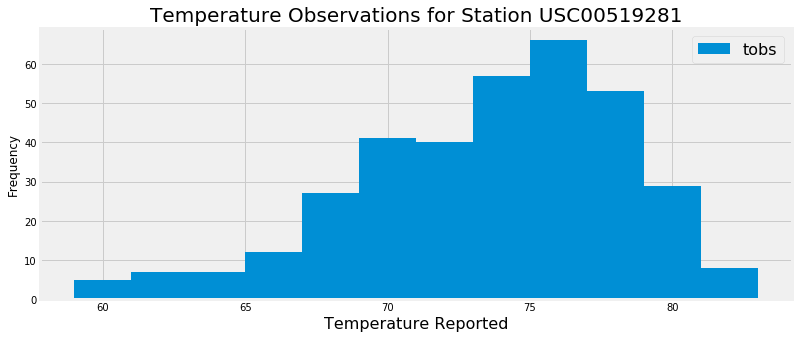

In [124]:
temp_df.plot.hist(by='station', bins=12, figsize=(12,5))
plt.grid
plt.title("Temperature Observations for Station " + mostactivestation, fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("StationTemps.png")
plt.show

![precipitation](Images/station-histogram.png)

In [102]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [109]:

#Step1: Calculate previous year's date based on the current trip start & end dates
Trip_start_date = input("Enter the trip start date in 'YYYY-MM-DD' format: ")
Trip_end_date = input("Enter the trip end date in 'YYYY-MM-DD' format: ")

Enter the trip start date in 'YYYY-MM-DD' format: 2011-06-06
Enter the trip end date in 'YYYY-MM-DD' format: 2011-07-07


In [110]:
Struct = dt.date.today()
Trip_start_date_dateformat = Struct.replace(year=int(Trip_start_date[:4]),month=int(Trip_start_date[5:7]),day=int(Trip_start_date[8:]))
Previous_Trip_start_date = Trip_start_date_dateformat - dt.timedelta(days=365)
Previous_Trip_start_date = Previous_Trip_start_date.strftime("%Y-%m-%d")
Previous_Trip_start_date
Trip_end_date_dateformat = Struct.replace(year=int(Trip_end_date[:4]),month=int(Trip_end_date[5:7]),day=int(Trip_end_date[8:]))
Previous_Trip_end_date = Trip_end_date_dateformat - dt.timedelta(days=365)
Previous_Trip_end_date = Previous_Trip_end_date.strftime("%Y-%m-%d")
Previous_Trip_end_date

'2010-07-07'

In [111]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
results=calc_temps(Previous_Trip_start_date, Previous_Trip_end_date)
results

[(69.0, 74.6953125, 85.0)]

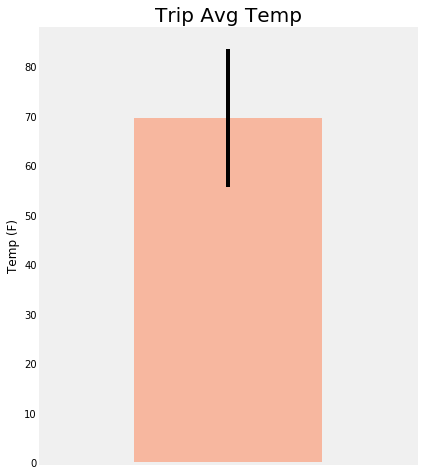

In [104]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig("TempSummary.png")
plt.show()

In [127]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
Results = session.query(Measurement.station, func.sum(Measurement.prcp))\
                       .filter(Measurement.date>=Previous_Trip_start_date).filter(Measurement.date<=Previous_Trip_end_date)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()  
print("Station Id\tTotal Rainfall")
for each in Results: print(each[0],"\t",each[1])


Station Id	Total Rainfall
USC00516128 	 9.710000000000003
USC00519281 	 2.9800000000000004
USC00518838 	 2.96
USC00514830 	 1.54
USC00513117 	 1.3000000000000003
USC00519523 	 1.02
USC00519397 	 0.44
USC00511918 	 0.43000000000000005
USC00517948 	 0.24


In [128]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
Results = session.query(*sel).filter(Measurement.station==Station.station)\
                       .filter(Measurement.date>=Previous_Trip_start_date).filter(Measurement.date<=Previous_Trip_end_date)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
for result in Results: print(result)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 9.710000000000003, 21.3331, -157.8025, 152.4)
('USC00519281', 'WAIHEE 837.5, HI US', 2.9800000000000004, 21.45167, -157.84888999999998, 32.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 2.96, 21.4992, -158.0111, 306.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1.54, 21.5213, -157.8374, 7.0)
('USC00513117', 'KANEOHE 838.1, HI US', 1.3000000000000003, 21.4234, -157.8015, 14.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 1.02, 21.33556, -157.71139, 19.5)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.44, 21.2716, -157.8168, 3.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.43000000000000005, 21.3152, -157.9992, 0.9)
('USC00517948', 'PEARL CITY, HI US', 0.24, 21.3934, -157.9751, 11.9)


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
